# Xiaowei Zhao  UNI: xz2767

## Task 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### 2.1

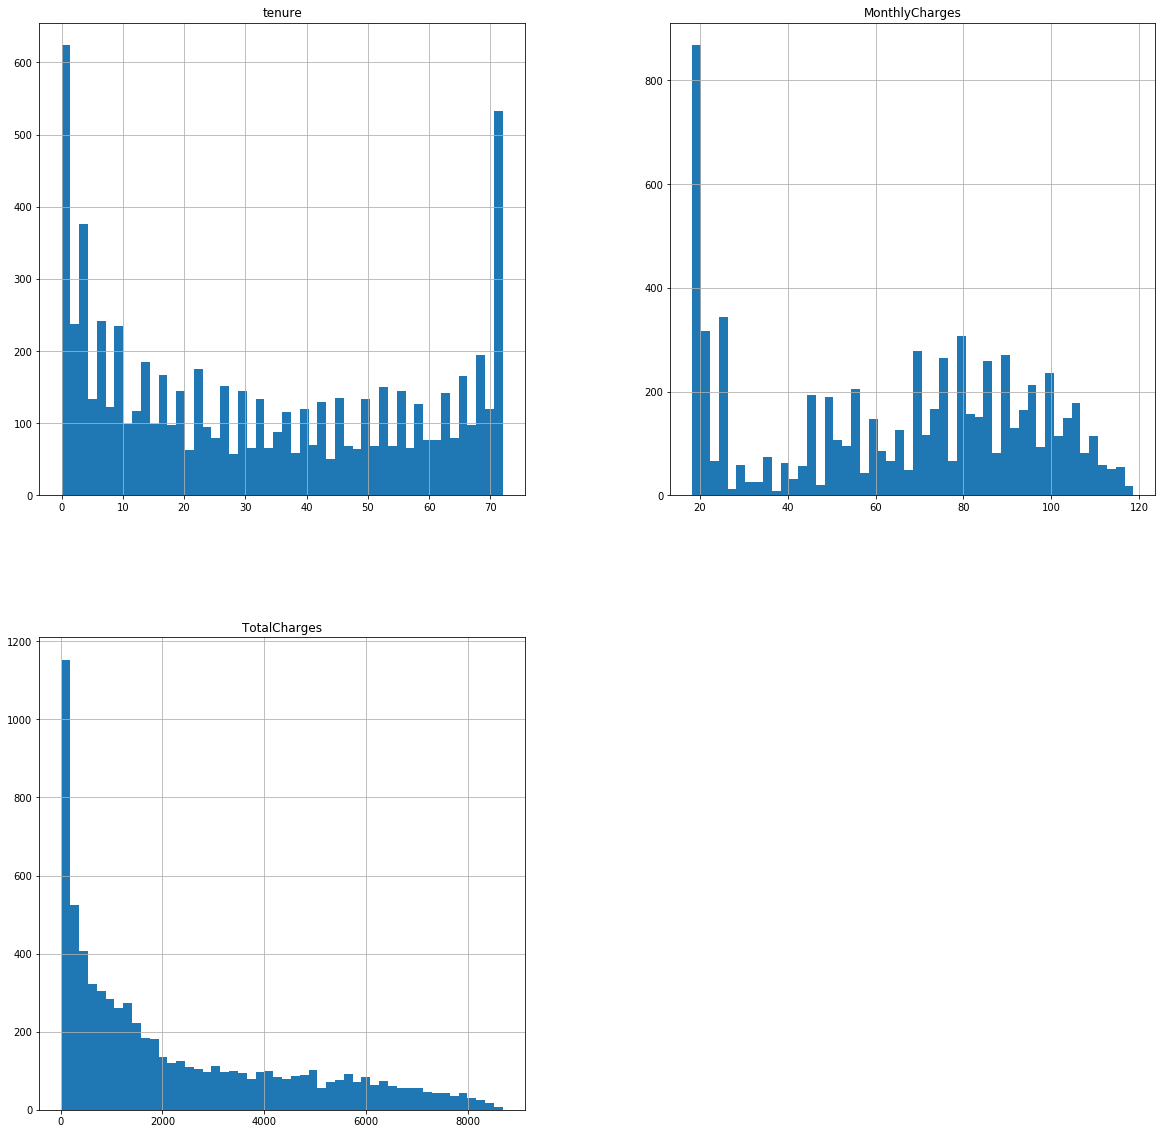

In [30]:
df = pd.DataFrame({'tenure':data['tenure'], 'MonthlyCharges':data['MonthlyCharges'],'TotalCharges':data['TotalCharges']})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
ncols = 2
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            df.hist(column=df.columns[counter],bins=50,ax=ax)
        else:
            ax.set_axis_off()

        counter += 1

Text(0.5, 1.0, 'The distribution of target variable: Churn')

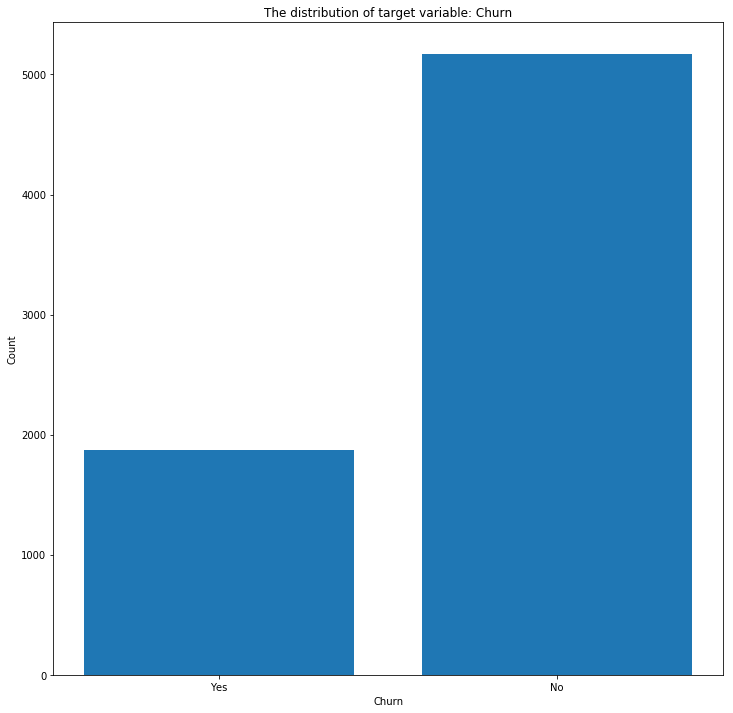

In [26]:
fig, axes = plt.subplots(figsize=(12, 12))
df_target=pd.DataFrame({'Churn':data['Churn']})
yes=np.sum(df_target=='Yes')
no=np.sum(df_target=='No')
x=['Yes','No']
y=[yes[0],no[0]]
plt.bar(x,y)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("The distribution of target variable: Churn")


### 2.2

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

categorical = data.dtypes == object
categorical['SeniorCitizen']=True
categorical['TotalCharges']=False

cat=data.columns[categorical.values.tolist()]
# values=dict(zip(cat,['none']*len(cat)))
# data=data.reset_index()
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(np.mean(data['TotalCharges']), inplace = True) 

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], data[['Churn']])

categorical = X_train.dtypes == object
categorical['SeniorCitizen']=True
categorical['TotalCharges']=False
preprocess0 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore',sparse = False), categorical))
model_log_1 = make_pipeline(preprocess0, LogisticRegression())
model_svc_1 = make_pipeline(preprocess0, LinearSVC())
model_nc_1 = make_pipeline(preprocess0, NearestCentroid())

In [75]:
import warnings
warnings.filterwarnings('ignore')
print("Without scaling the data (within the pipeline) with StandardScaler")
scores_log = cross_val_score(model_log_1, X_train, y_train, cv=5)
print("Logistic Regression mean of CV R^2: {}".format(np.mean(scores_log)))
scores_svc = cross_val_score(model_svc_1, X_train, y_train, cv=5)
print("Linear SVC mean of CV R^2: {}".format(np.mean(scores_svc)))
scores_nc = cross_val_score(model_nc_1, X_train, y_train, cv=5)
print("Nearest Centroid mean of CV R^2: {}".format(np.mean(scores_nc)))

Without scaling the data (within the pipeline) with StandardScaler
Logistic Regression mean of CV R^2: 0.7832258249476791
Linear SVC mean of CV R^2: 0.7826583598520684
Nearest Centroid mean of CV R^2: 0.7004920300450102


In [70]:
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(handle_unknown='ignore',sparse = False), categorical))
model_log = make_pipeline(preprocess, LogisticRegression())
model_svc = make_pipeline(preprocess, LinearSVC())
model_nc = make_pipeline(preprocess, NearestCentroid())

In [71]:
print("With scaling the data using StandardScaler")
scores_log = cross_val_score(model_log, X_train, y_train, cv=5)
print("Logistic Regression mean of CV R^2: {}".format(np.mean(scores_log)))
scores_svc = cross_val_score(model_svc, X_train, y_train, cv=5)
print("Linear SVC mean of CV R^2: {}".format(np.mean(scores_svc)))
scores_nc = cross_val_score(model_nc, X_train, y_train, cv=5)
print("Nearest Centroid mean of CV R^2: {}".format(np.mean(scores_nc)))

With scaling the data using StandardScaler
Logistic Regression mean of CV R^2: 0.8023489865542845
Linear SVC mean of CV R^2: 0.7991285711636219
Nearest Centroid mean of CV R^2: 0.7315369482034448


#### It seems like the performance of Logistic regression is best among three models 
#### and Linear SVC is better than Nearest Centroid
#### Scaling the continuous features with StandardScaler improve the scores

### 2.3

The best parameter for Logistic Regression is: {'logisticregression__C': 0.1}
The best R^2 for Logistic Regression is: 0.8029155622870124


Text(0, 0.5, 'Score')

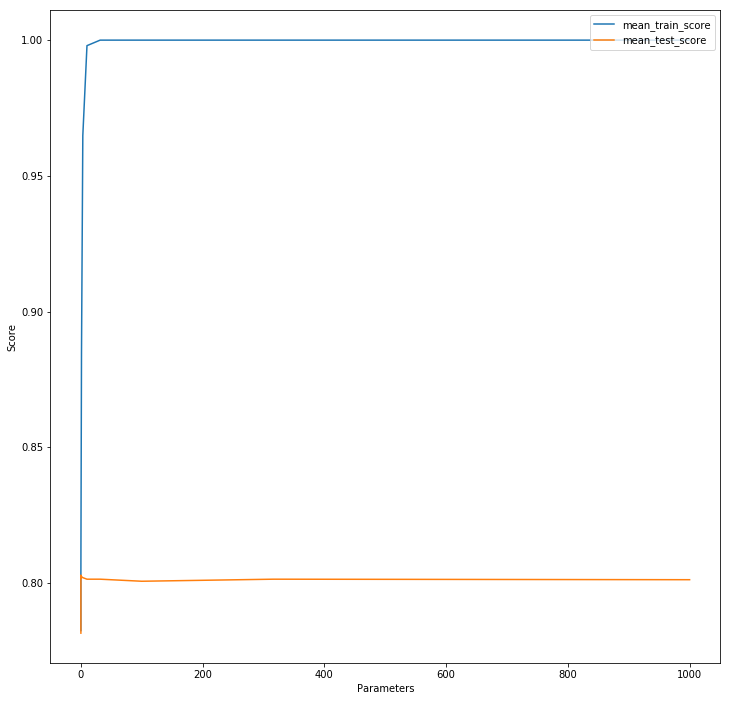

In [32]:
from sklearn.model_selection import GridSearchCV
param_log = {'logisticregression__C': np.logspace(-3, 3, 13)}
grid_log = GridSearchCV(model_log, param_log, cv=5)
grid_log.fit(X_train, y_train)
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))
fig, axes = plt.subplots(figsize=(12, 12))
plt.plot(np.logspace(-3, 3, 13), grid_log.cv_results_['mean_train_score'],label='mean_train_score')
plt.plot(np.logspace(-3, 3, 13), grid_log.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend(loc='upper right')
plt.xlabel('Parameters')
plt.ylabel('Score')

The best parameter for LinearSVC is: {'linearsvc__C': 0.0031622776601683794}
The best R^2 for LinearSVC is: 0.8010223400227187


Text(0, 0.5, 'Score')

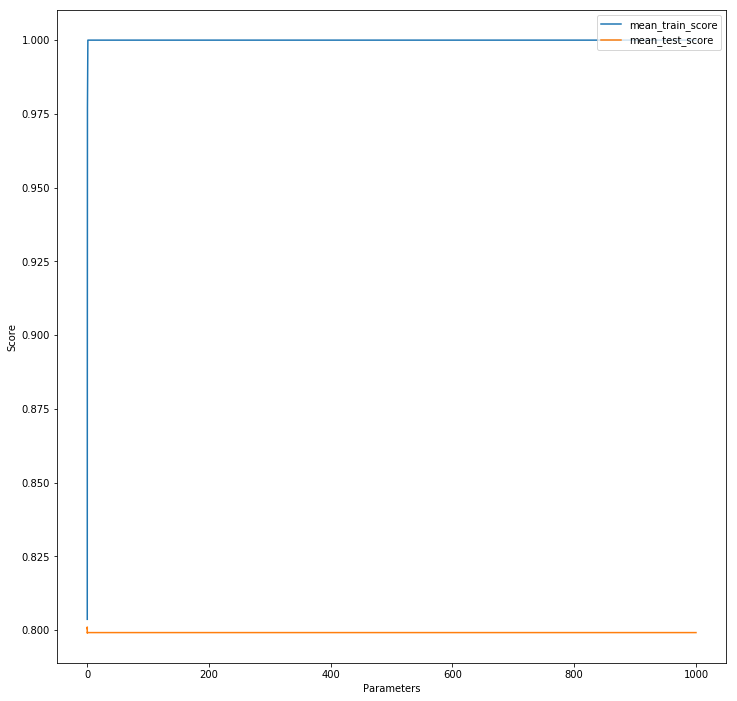

In [34]:
param_svc= {'linearsvc__C': np.logspace(-3, 3, 13)}
grid_svc = GridSearchCV(model_svc, param_svc, cv=5)
grid_svc.fit(X_train, y_train)
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))
fig, axes = plt.subplots(figsize=(12, 12))
plt.plot(np.logspace(-3, 3, 13), grid_svc.cv_results_['mean_train_score'],label='mean_train_score')
plt.plot(np.logspace(-3, 3, 13), grid_svc.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend(loc='upper right')
plt.xlabel('Parameters')
plt.ylabel('Score')

The best parameter for Nearest Centroid is: {'nearestcentroid__shrink_threshold': 0.1}
The best R^2 for Nearest Centroid is: 0.7345702385460053


Text(0, 0.5, 'Score')

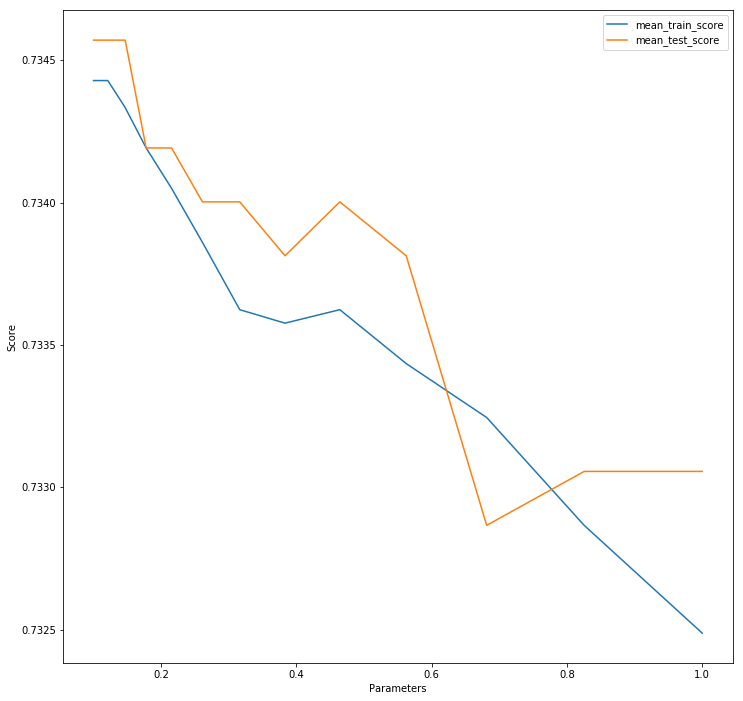

In [78]:
param_nc ={"nearestcentroid__shrink_threshold" : np.logspace(-1, 0, 13)}
grid_nc = GridSearchCV(model_nc, param_nc, cv=5)
grid_nc.fit(X_train, y_train)
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))
fig, axes = plt.subplots(figsize=(12, 12))
plt.plot(np.logspace(-1, 0, 13), grid_nc.cv_results_['mean_train_score'],label='mean_train_score')
plt.plot(np.logspace(-1, 0, 13), grid_nc.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend(loc='upper right')
plt.xlabel('Parameters')
plt.ylabel('Score')

#### The results do improve.

### 2.4

In [85]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
kfold = KFold(n_splits=5,shuffle=True)
skfold = StratifiedKFold(n_splits=5, shuffle=True)

In [86]:
grid_log = GridSearchCV(model_log, param_log, cv=kfold)
grid_log.fit(X_train, y_train)
print("The cross-validation strategy is‘kfold’ with shuffling.")
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))

The cross-validation strategy is‘kfold’ with shuffling.
The best parameter for Logistic Regression is: {'logisticregression__C': 0.01}
The best R^2 for Logistic Regression is: 0.798750473305566


In [87]:
grid_svc = GridSearchCV(model_svc, param_svc, cv=kfold)
grid_svc.fit(X_train, y_train)
print("The cross-validation strategy is‘kfold’ with shuffling.")
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))

The cross-validation strategy is‘kfold’ with shuffling.
The best parameter for LinearSVC is: {'linearsvc__C': 0.01}
The best R^2 for LinearSVC is: 0.7985611510791367


In [88]:
grid_nc = GridSearchCV(model_nc, param_nc, cv=kfold)
grid_nc.fit(X_train, y_train)
print("The cross-validation strategy is‘kfold’ with shuffling.")
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))

The cross-validation strategy is‘kfold’ with shuffling.
The best parameter for Nearest Centroid is: {'nearestcentroid__shrink_threshold': 0.1}
The best R^2 for Nearest Centroid is: 0.733434305187429


In [89]:
grid_log = GridSearchCV(model_log, param_log, cv=skfold)
grid_log.fit(X_train, y_train)
print("The cross-validation strategy is 'stratified k-fold'.")
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))

The cross-validation strategy is 'stratified k-fold'.
The best parameter for Logistic Regression is: {'logisticregression__C': 0.03162277660168379}
The best R^2 for Logistic Regression is: 0.8012116622491481


In [90]:
grid_svc = GridSearchCV(model_svc, param_svc, cv=skfold)
grid_svc.fit(X_train, y_train)
print("The cross-validation strategy is 'stratified k-fold'.")
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))

The cross-validation strategy is 'stratified k-fold'.
The best parameter for LinearSVC is: {'linearsvc__C': 0.001}
The best R^2 for LinearSVC is: 0.798750473305566


In [91]:
grid_nc = GridSearchCV(model_nc, param_nc, cv=skfold)
grid_nc.fit(X_train, y_train)
print("The cross-validation strategy is 'stratified k-fold'.")
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))

The cross-validation strategy is 'stratified k-fold'.
The best parameter for Nearest Centroid is: {'nearestcentroid__shrink_threshold': 0.1}
The best R^2 for Nearest Centroid is: 0.7326770162817114


In [92]:
kfold = KFold(n_splits=5,shuffle=True,random_state = 123)
grid_log = GridSearchCV(model_log, param_log, cv=kfold)
grid_log.fit(X_train, y_train)
print("The cross-validation strategy is‘kfold’ with shuffling when random state is 123.")
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))
grid_svc = GridSearchCV(model_svc, param_svc, cv=kfold)
grid_svc.fit(X_train, y_train)
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))
grid_nc = GridSearchCV(model_nc, param_nc, cv=kfold)
grid_nc.fit(X_train, y_train)
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))

The cross-validation strategy is‘kfold’ with shuffling when random state is 123.
The best parameter for Logistic Regression is: {'logisticregression__C': 0.01}
The best R^2 for Logistic Regression is: 0.7985611510791367
The best parameter for LinearSVC is: {'linearsvc__C': 0.001}
The best R^2 for LinearSVC is: 0.798750473305566
The best parameter for Nearest Centroid is: {'nearestcentroid__shrink_threshold': 0.46415888336127786}
The best R^2 for Nearest Centroid is: 0.7332449829609996


In [93]:
skfold = StratifiedKFold(n_splits=5, shuffle=True,random_state = 123)
grid_log = GridSearchCV(model_log, param_log, cv=skfold)
grid_log.fit(X_train, y_train)
print("The cross-validation strategy is 'stratified k-foldth'shuffling when random state is 123.")
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))
grid_svc = GridSearchCV(model_svc, param_svc, cv=skfold)
grid_svc.fit(X_train, y_train)
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))
grid_nc = GridSearchCV(model_nc, param_nc, cv=skfold)
grid_nc.fit(X_train, y_train)
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))

The cross-validation strategy is 'stratified k-foldth'shuffling when random state is 123.
The best parameter for Logistic Regression is: {'logisticregression__C': 1.0}
The best R^2 for Logistic Regression is: 0.8010223400227187
The best parameter for LinearSVC is: {'linearsvc__C': 0.001}
The best R^2 for LinearSVC is: 0.7995077622112836
The best parameter for Nearest Centroid is: {'nearestcentroid__shrink_threshold': 0.1}
The best R^2 for Nearest Centroid is: 0.7330556607345703


In [102]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], data[['Churn']],random_state=123)
kfold = KFold(n_splits=5,shuffle=True)
grid_log = GridSearchCV(model_log, param_log, cv=kfold)
grid_log.fit(X_train, y_train)
print("The cross-validation strategy is 'kfold' with shuffling")
print("When the random state of train_test_split is 123.")
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))
grid_svc = GridSearchCV(model_svc, param_svc, cv=kfold)
grid_svc.fit(X_train, y_train)
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))
grid_nc = GridSearchCV(model_nc, param_nc, cv=kfold)
grid_nc.fit(X_train, y_train)
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))
skfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_log = GridSearchCV(model_log, param_log, cv=skfold)
grid_log.fit(X_train, y_train)
print("The cross-validation strategy is 'stratified k-foldth' shuffling.")
print("When the random state of train_test_split is 123.")
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))
grid_svc = GridSearchCV(model_svc, param_svc, cv=skfold)
grid_svc.fit(X_train, y_train)
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))
grid_nc = GridSearchCV(model_nc, param_nc, cv=skfold)
grid_nc.fit(X_train, y_train)
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))

The cross-validation strategy is 'kfold' with shuffling
When the random state of train_test_split is 123.
The best parameter for Logistic Regression is: {'logisticregression__C': 0.01}
The best R^2 for Logistic Regression is: 0.8049981067777358
The best parameter for LinearSVC is: {'linearsvc__C': 0.001}
The best R^2 for LinearSVC is: 0.8084059068534646
The best parameter for Nearest Centroid is: {'nearestcentroid__shrink_threshold': 0.12115276586285885}
The best R^2 for Nearest Centroid is: 0.7360848163574404
The cross-validation strategy is 'stratified k-foldth' shuffling.
When the random state of train_test_split is 123.
The best parameter for Logistic Regression is: {'logisticregression__C': 10.0}
The best R^2 for Logistic Regression is: 0.8057553956834532
The best parameter for LinearSVC is: {'linearsvc__C': 0.001}
The best R^2 for LinearSVC is: 0.8065126845891708
The best parameter for Nearest Centroid is: {'nearestcentroid__shrink_threshold': 0.31622776601683794}
The best R^2 fo

In [103]:
kfold = KFold(n_splits=5,shuffle=True,random_state = 123)
grid_log = GridSearchCV(model_log, param_log, cv=kfold)
grid_log.fit(X_train, y_train)
print("The cross-validation strategy is 'kfold' with shuffling when random state is 123.")
print("When the random state of train_test_split is 123.")
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))
grid_svc = GridSearchCV(model_svc, param_svc, cv=kfold)
grid_svc.fit(X_train, y_train)
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))
grid_nc = GridSearchCV(model_nc, param_nc, cv=kfold)
grid_nc.fit(X_train, y_train)
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))
skfold = StratifiedKFold(n_splits=5, shuffle=True,random_state = 123)
grid_log = GridSearchCV(model_log, param_log, cv=skfold)
grid_log.fit(X_train, y_train)
print("The cross-validation strategy is 'stratified k-foldth' shuffling when random state is 123.")
print("When the random state of train_test_split is 123.")
print("The best parameter for Logistic Regression is: {}".format(grid_log.best_params_))
print("The best R^2 for Logistic Regression is: {}".format(grid_log.best_score_))
grid_svc = GridSearchCV(model_svc, param_svc, cv=skfold)
grid_svc.fit(X_train, y_train)
print("The best parameter for LinearSVC is: {}".format(grid_svc.best_params_))
print("The best R^2 for LinearSVC is: {}".format(grid_svc.best_score_))
grid_nc = GridSearchCV(model_nc, param_nc, cv=skfold)
grid_nc.fit(X_train, y_train)
print("The best parameter for Nearest Centroid is: {}".format(grid_nc.best_params_))
print("The best R^2 for Nearest Centroid is: {}".format(grid_nc.best_score_))

The cross-validation strategy is 'kfold' with shuffling when random state is 123.
When the random state of train_test_split is 123.
The best parameter for Logistic Regression is: {'logisticregression__C': 0.01}
The best R^2 for Logistic Regression is: 0.8068913290420295
The best parameter for LinearSVC is: {'linearsvc__C': 0.001}
The best R^2 for LinearSVC is: 0.8057553956834532
The best parameter for Nearest Centroid is: {'nearestcentroid__shrink_threshold': 0.14677992676220694}
The best R^2 for Nearest Centroid is: 0.7377887163953049
The cross-validation strategy is 'stratified k-foldth' shuffling when random state is 123.
When the random state of train_test_split is 123.
The best parameter for Logistic Regression is: {'logisticregression__C': 0.01}
The best R^2 for Logistic Regression is: 0.8076486179477471
The best parameter for LinearSVC is: {'linearsvc__C': 0.001}
The best R^2 for LinearSVC is: 0.8067020068156001
The best parameter for Nearest Centroid is: {'nearestcentroid__shri

#### The best parameter and score for Logistic Regression are:
#### In the normal cross-validation: 0.1 and 0.8029155622870124
#### In the kfold with shuffling: 0.01 and 0.798750473305566
#### In the 'stratified k-fold': 0.03162277660168379 and 0.8012116622491481
#### In the ‘kfold’ (random state: 123) : 0.01 and 0.7985611510791367
#### In the 'stratified k-foldth' (random state: 123) : 1 and 0.8010223400227187
#### In the kfold (train_test_split: 123): 0.01 and 0.8049981067777358
#### In the stratified k-foldth (train_test_split: 123): 10 and 0.8057553956834532
#### In the kfold(both of random state: 123): 0.01 and 0.8068913290420295
#### In the stratified k-foldth(both of random state: 123): 0.01 and 0.8076486179477471


#### The best parameter and score for LinearSVC are: 
#### In the normal cross-validation:0.0031622776601683794 and 0.8010223400227187
#### In the kfold with shuffling: 0.01 and 0.7985611510791367
#### In the 'stratified k-fold': 0.001 and 0.798750473305566
#### In the ‘kfold’ (random state: 123) : 0.001 and 0.798750473305566
#### In the 'stratified k-foldth' (random state: 123) : 0.001 and 0.7995077622112836
#### In the kfold (train_test_split: 123): 0.001 and 0.8084059068534646
#### In the stratified k-foldth (train_test_split: 123): 0.001 and 0.8065126845891708
#### In the kfold(both of random state: 123): 0.001 and 0.8057553956834532
#### In the stratified k-foldth(both of random state: 123): 0.001 and 0.8067020068156001


#### The best parameter and score for Nearest Centroid are: 
#### In the normal cross-validation: 0.1 and 0.7345702385460053
#### In the kfold with shuffling: 0.1 and 0.733434305187429
#### In the 'stratified k-fold': 0.1 and 0.7326770162817114
#### In the ‘kfold’ (random state: 123) : 0.46415888336127786 and 0.7332449829609996
#### In the 'stratified k-foldth' (random state: 123) : 0.1 and 0.7330556607345703
#### In the kfold (train_test_split: 123):  0.12115276586285885 and 0.7360848163574404 
#### In the stratified k-foldth (train_test_split: 123): 0.31622776601683794 and 0.7362741385838697
#### In the kfold(both of random state: 123): 0.14677992676220694  and 0.7377887163953049
#### In the stratified k-foldth(both of random state: 123): 0.1778279410038923 and 0.7370314274895873



### Some obervations
#### As we can see the results above, when changing the cross-validation strategy from 
#### ‘stratified k-fold’ to ‘kfold’ with shuffling, the parameters do change in Logistic Regression
#### and LinearSVC model but not in Nearest Centroid

#### When I change the random seed of the shuffling, some parameters change and some not.

#### When I change the random state of the split into training and test data, also  some change and some not.

#### In the Logistic regression, 0.01 is the most frequent parameter and also the best parameter when using
#### stratified k-foldth (random state 123) and train_test_split (123)

#### In the LinearSVC, 0.001 is the most frequent parameter and also the best parameter when using
#### stratified k-foldth (random state 123) and train_test_split (123)

#### In the Nearest Centroid, 0.1 is the most frequent parameter but the best parameter is  0.14677992676220694
#### when using kfold (random state 123) and train_test_split (123)

### 2.5

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
categorical = data.dtypes == object
categorical['SeniorCitizen']=True
categorical['TotalCharges']=False

cat=data.columns[categorical.values.tolist()]
# values=dict(zip(cat,['none']*len(cat)))
# data=data.reset_index()
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(np.mean(data['TotalCharges']), inplace = True) 

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], data[['Churn']],random_state=123)

categorical = X_train.dtypes == object
categorical['SeniorCitizen']=True
categorical['TotalCharges']=False
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(handle_unknown='ignore',sparse = False), categorical))
model_log = make_pipeline(preprocess, LogisticRegression(C= 0.01))
model_svc = make_pipeline(preprocess, LinearSVC(C=0.001))

model_log.fit(X_train, y_train)
model_svc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), customerID          False
gender              False
SeniorCitizen...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

Text(0.5, 1.0, 'Coef for Logistic Regression when parameter = 0.01')

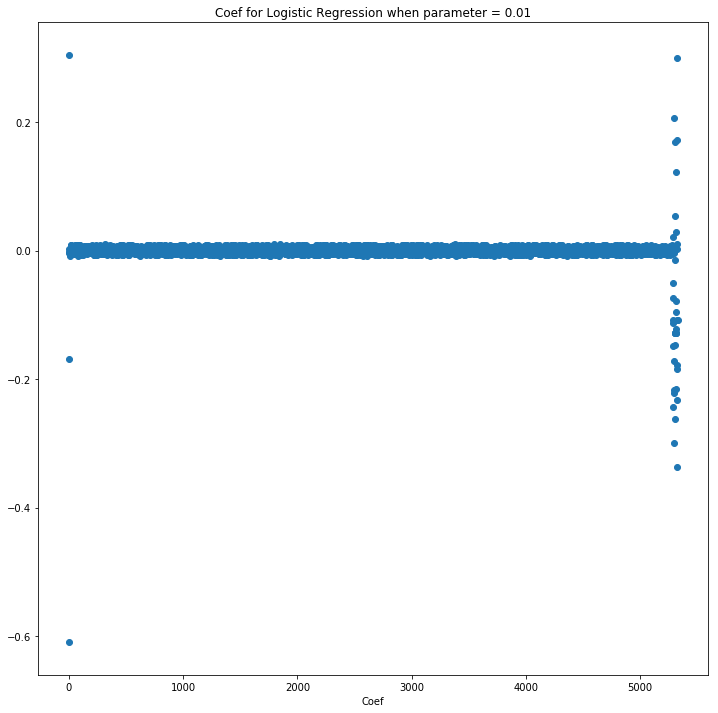

In [13]:
coef_log=model_log.named_steps['logisticregression'].coef_
feature2_log=model_log.steps[0][1].named_transformers_['onehotencoder'].get_feature_names()
feature1_log=['tenure', 'MonthlyCharges','TotalCharges']
feature_log=np.concatenate((feature1_log,feature2_log))
fig, axes = plt.subplots(figsize=(12, 12))
plt.scatter(range(len(coef_log[0])),coef_log.reshape(-1,1))
plt.xlabel('Coef')
plt.title('Coef for Logistic Regression when parameter = 0.01')

Text(0.5, 1.0, 'Top 10 feature for Logistic Regression')

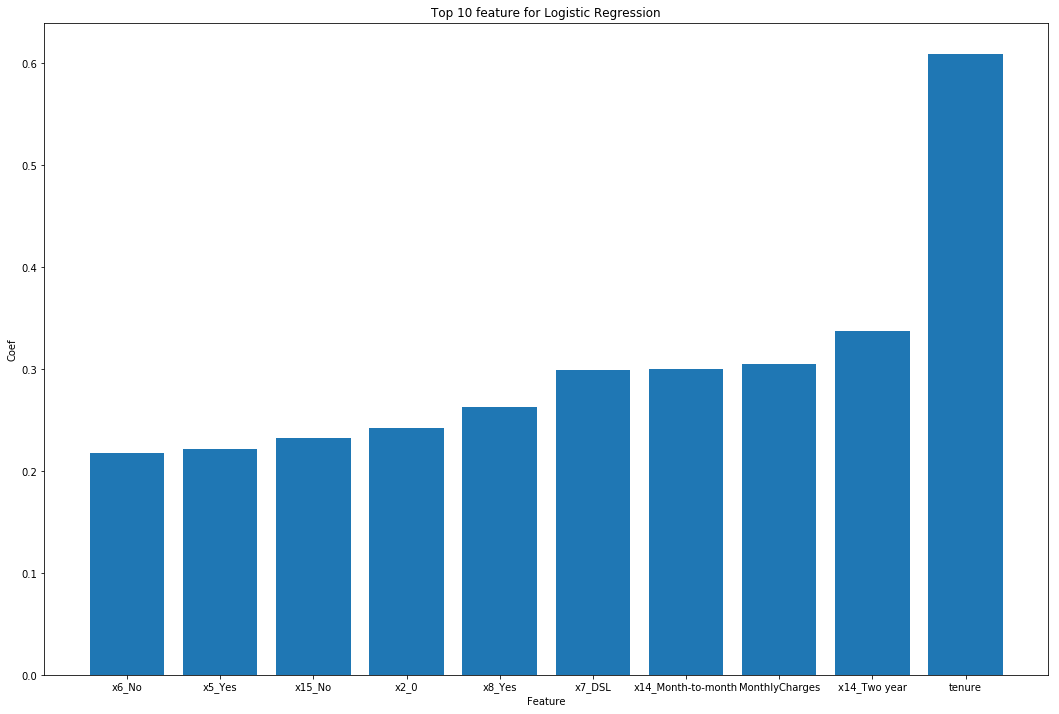

In [19]:
coef_log=np.abs(coef_log)
top_10_idx_log = np.argsort(coef_log)
top_10_features_log = [feature_log[i] for i in top_10_idx_log ][0][-10:]
top_10_coef_log=[coef_log[0][i] for i in top_10_idx_log ][0][-10:]
fig, axes = plt.subplots(figsize=(18, 12))
plt.bar(top_10_features_log, top_10_coef_log, align='center')
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Top 10 feature for Logistic Regression')

Text(0.5, 1.0, 'Coef for Linear SVC when parameter = 0.001')

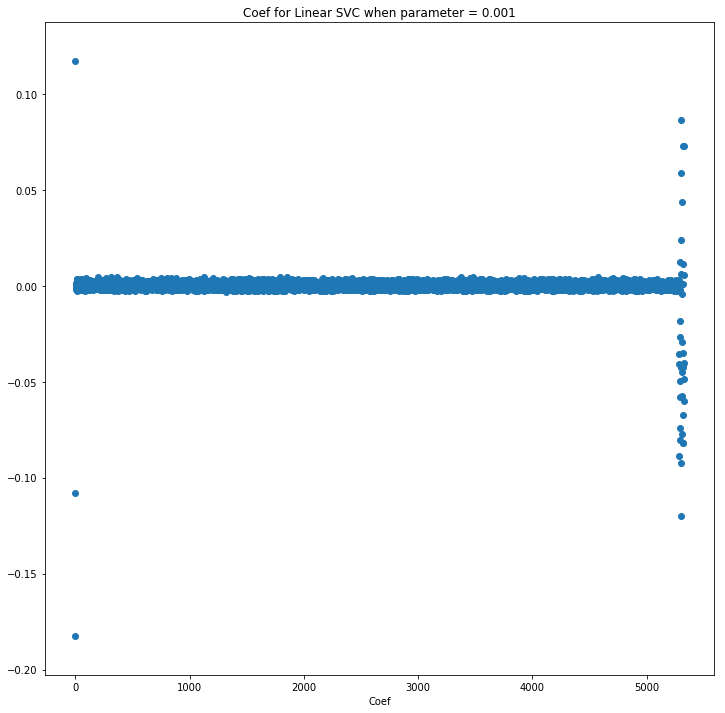

In [23]:
coef_svc=model_svc.named_steps['linearsvc'].coef_
feature2_svc=model_svc.steps[0][1].named_transformers_['onehotencoder'].get_feature_names()
feature1_svc=['tenure', 'MonthlyCharges','TotalCharges']
feature_svc=np.concatenate((feature1_svc,feature2_svc))
fig, axes = plt.subplots(figsize=(12, 12))
plt.scatter(range(len(coef_svc[0])),coef_svc.reshape(-1,1))
plt.xlabel('Coef')
plt.title('Coef for Linear SVC when parameter = 0.001')

Text(0.5, 1.0, 'Top 10 feature for Linear SVC')

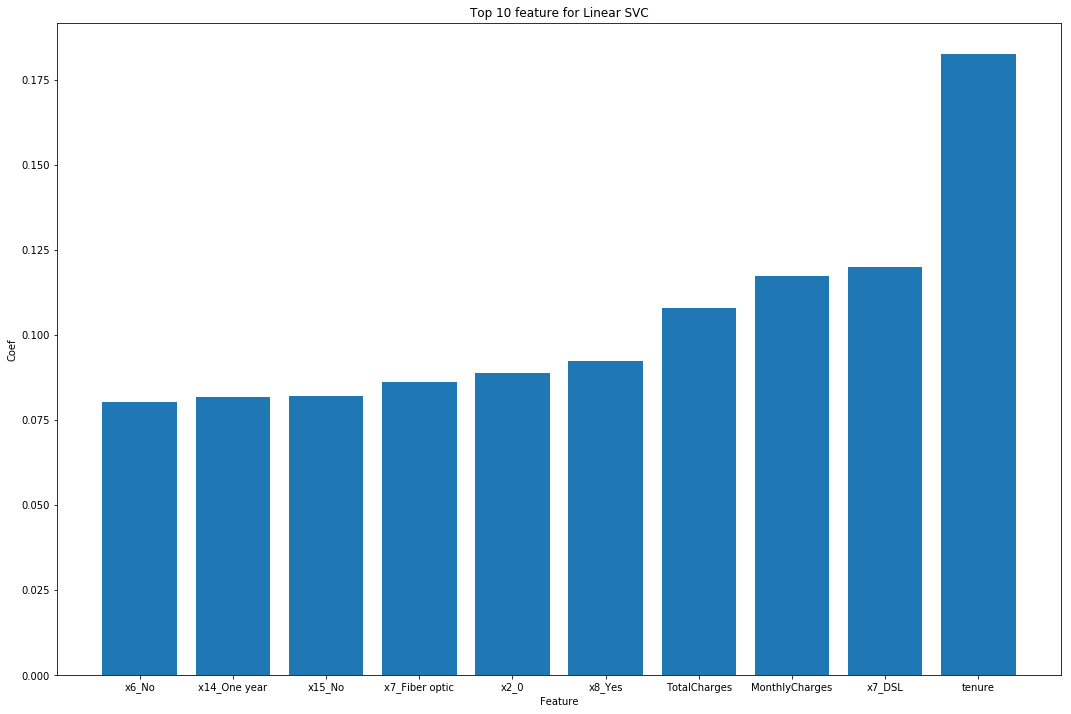

In [24]:
coef_svc=np.abs(coef_svc)
top_10_idx_svc = np.argsort(coef_svc)
top_10_features_svc = [feature_svc[i] for i in top_10_idx_svc ][0][-10:]
top_10_coef_svc=[coef_svc[0][i] for i in top_10_idx_svc ][0][-10:]
fig, axes = plt.subplots(figsize=(18, 12))
plt.bar(top_10_features_svc, top_10_coef_svc, align='center')
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Top 10 feature for Linear SVC')

#### After I plot the top 10 features of each model, I notice they do agree on some features are important.
#### For example, tenure, x7_DSL and Monthly Charges